In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5, ), std = (0.5, ))
])

mnist = dsets.MNIST(root = './data', train = True, transform = transform, download = True)
data_loader = DataLoader(dataset = mnist, batch_size = 50, shuffle = True)

In [12]:
class üretici(nn.Module):
    def __init__(self):
      super(üretici, self).__init__()
      self.main = nn.Sequential(
          nn.Linear(100, 256),
          nn.ReLU(True),
          nn.Linear(256, 512),
          nn.ReLU(True),
          nn.Linear(512, 1024),
          nn.ReLU(True),
          nn.Linear(1024, 784),
          nn.Tanh()
      )
    def forward(self, x):
      return self.main(x)

In [13]:
class ayirt_edici(nn.Module):
    def __init__(self):
      super(ayirt_edici, self).__init__()
      self.main = nn.Sequential(
          nn.Linear(784, 1024),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Linear(1024, 512),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Linear(512, 256),
          nn.LeakyReLU(0.2, inplace = True),
          nn.Linear(256, 1),
          nn.Sigmoid()
      )
    def forward(self, x):
      return self.main(x)

In [14]:
generator = üretici().to(device)
discriminator = ayirt_edici().to(device)

In [15]:
criterion = nn.BCELoss()
G_optimizer = optim.Adam(generator.parameters(), lr = 0.0002)
D_optimizer = optim.Adam(discriminator.parameters(), lr = 0.0002)

In [18]:
n_epochs = 50

for epoch in range(n_epochs):
    for i, (images, _) in enumerate(data_loader):
        real_labels = torch.ones(images.size(0), 1).to(device)
        fake_labels = torch.zeros(images.size(0), 1).to(device)

        images = images.view(images.size(0), -1).to(device)

        D_optimizer.zero_grad()
        outputs = discriminator(images)
        D_loss_real = criterion(outputs, real_labels)
        D_loss_real.backward()

        z = torch.randn(images.size(0), 100).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        D_loss_fake = criterion(outputs, fake_labels)
        D_loss_fake.backward()
        D_optimizer.step()

        G_optimizer.zero_grad()
        z = torch.randn(images.size(0), 100).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        G_loss = criterion(outputs, real_labels)
        G_loss.backward()
        G_optimizer.step()
    print(f'Epoch: {epoch + 1}/{n_epochs}, D Loss: {D_loss_real + D_loss_fake:.2f}, G Loss: {G_loss:.2f}')

Epoch: 1/50, D Loss: 0.04, G Loss: 9.70
Epoch: 2/50, D Loss: 3.60, G Loss: 5.01
Epoch: 3/50, D Loss: 0.05, G Loss: 5.23
Epoch: 4/50, D Loss: 0.36, G Loss: 3.76
Epoch: 5/50, D Loss: 0.09, G Loss: 8.22
Epoch: 6/50, D Loss: 0.19, G Loss: 4.16
Epoch: 7/50, D Loss: 0.14, G Loss: 4.24
Epoch: 8/50, D Loss: 0.37, G Loss: 4.10
Epoch: 9/50, D Loss: 0.18, G Loss: 2.06
Epoch: 10/50, D Loss: 0.18, G Loss: 7.42
Epoch: 11/50, D Loss: 0.28, G Loss: 5.40
Epoch: 12/50, D Loss: 0.17, G Loss: 5.36
Epoch: 13/50, D Loss: 0.48, G Loss: 3.49
Epoch: 14/50, D Loss: 0.32, G Loss: 3.95
Epoch: 15/50, D Loss: 0.49, G Loss: 3.58
Epoch: 16/50, D Loss: 0.32, G Loss: 2.61
Epoch: 17/50, D Loss: 0.47, G Loss: 2.30
Epoch: 18/50, D Loss: 0.52, G Loss: 2.23
Epoch: 19/50, D Loss: 0.74, G Loss: 2.16
Epoch: 20/50, D Loss: 0.59, G Loss: 1.76
Epoch: 21/50, D Loss: 0.69, G Loss: 2.75
Epoch: 22/50, D Loss: 0.80, G Loss: 2.08
Epoch: 23/50, D Loss: 1.01, G Loss: 2.69
Epoch: 24/50, D Loss: 0.59, G Loss: 2.75
Epoch: 25/50, D Loss: 0.6

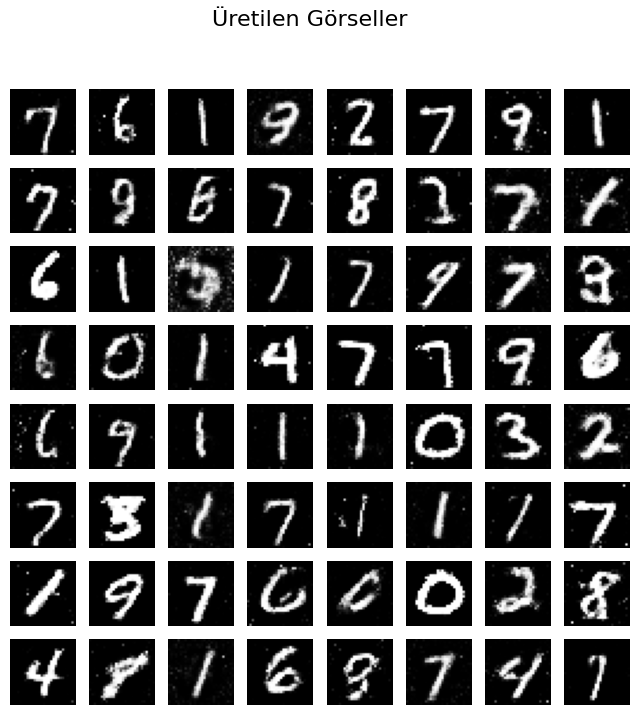

In [22]:
z = torch.randn(64, 100).to(device)
fake_images = generator(z)
fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
fake_images = fake_images.cpu().data

plt.figure(figsize = (8, 8))
plt.suptitle('Üretilen Görseller', fontsize = 16)

for i in range(64):
  plt.subplot(8, 8, i + 1)
  plt.imshow(fake_images[i][0], cmap = 'gray')
  plt.axis('off')
plt.show()